In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import datasets

## Bibliotecas do hierárquico

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

## Bibliotecas do Kmean

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

### Leitura dos dados Iris

In [4]:
iris_aux = datasets.load_iris()
iris = pd.DataFrame(iris_aux.data, columns=iris_aux.feature_names)
iris['target'] = pd.Series(iris_aux.target)
iris['species'] = pd.Categorical.from_codes(iris_aux.target, iris_aux.target_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#### Determinando os dados X (sem variável resposta)

In [6]:
X = iris.iloc[:,:4]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Dendrograma (método hierárquico)

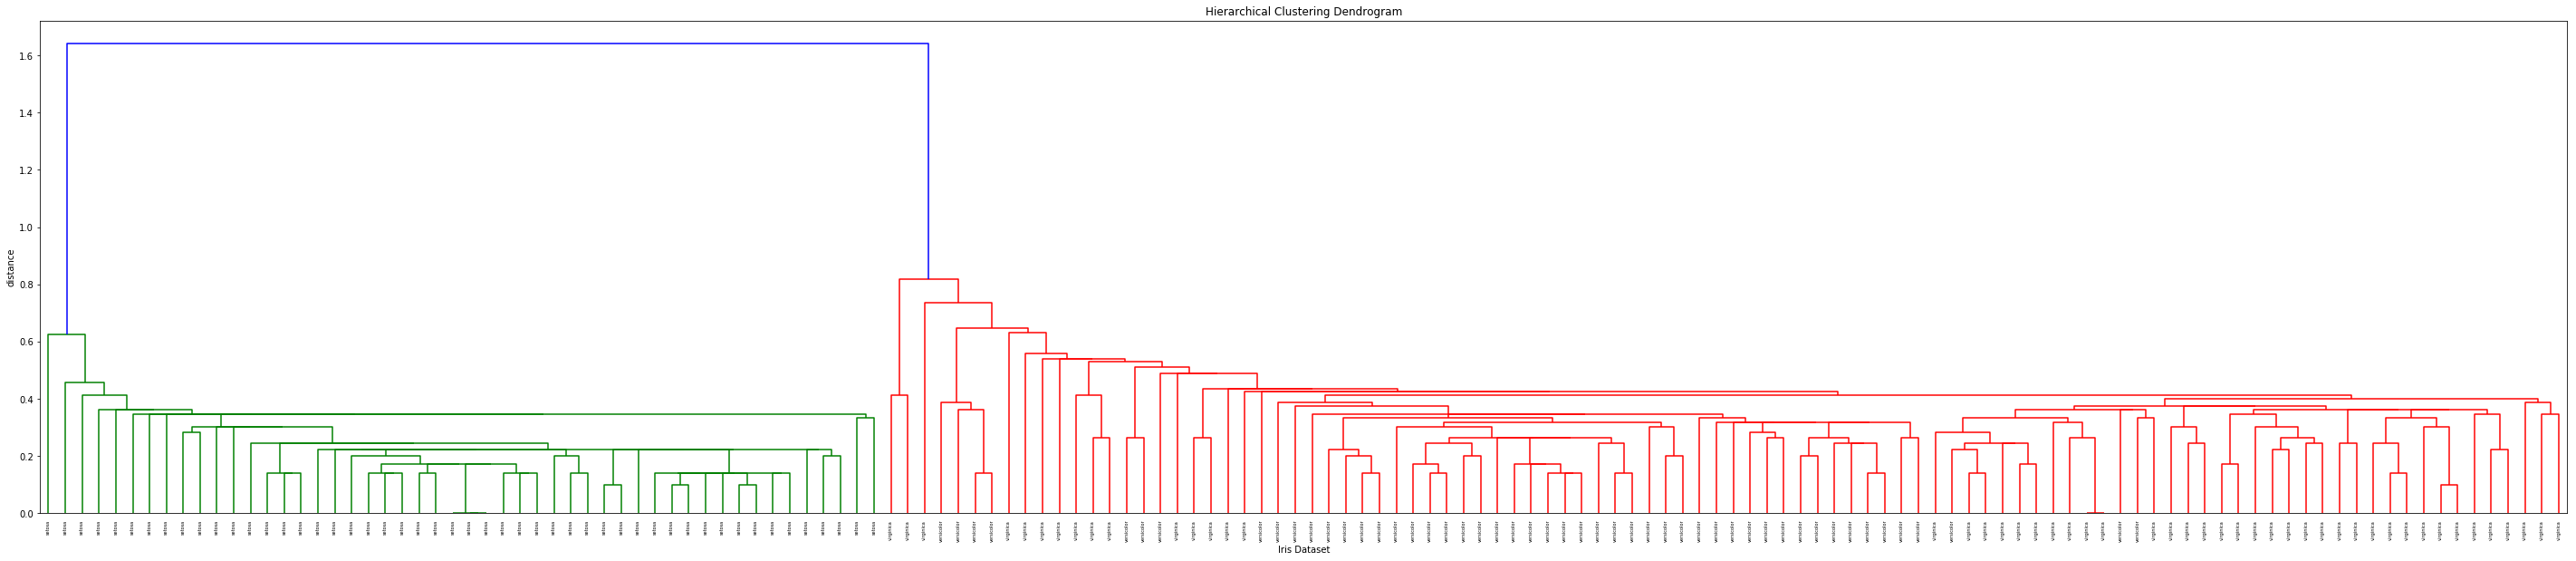

In [22]:
Z = linkage(X, method='single', metric='euclidean', optimal_ordering=False)
#Z = linkage(df, 'ward')
labels = np.array(iris['species'])
plt.figure(figsize=(50, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Iris Dataset')
plt.ylabel('distance')
dendrogram(Z,labels=labels)
plt.show()

##### k = 2 ou k = 3?

#### pegar informaçoes de 2 clusters:

In [24]:
from  scipy.cluster.hierarchy  import fcluster

In [29]:
k = 2
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

#### visualizando os clusters:

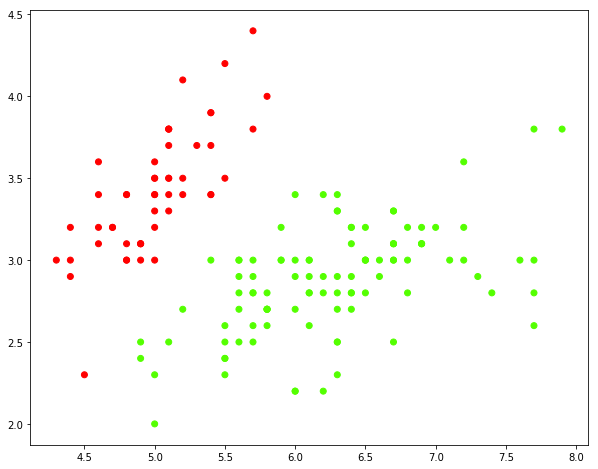

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(X.iloc[:,0],  X.iloc[:,1],  c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

In [35]:
X_new = pd.concat([X, pd.DataFrame(clusters, columns = ['label'])], axis = 1)
X_new.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


#### cálculo dos centróides

In [37]:
centroides = X_new.groupby(by = ['label']).mean()
centroides

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
label,,,,
1,5.006,3.418,1.464,0.244
2,6.262,2.872,4.906,1.676


### Kmeans com centroides do hierarquico

In [39]:
 kmeans = KMeans(n_clusters=2, init=centroides, n_init=1, max_iter=300, tol=0.0001, precompute_distances='auto', 
          verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
#nao precisa da variavel resposta em kmeans
X = iris.iloc[:,:4]
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True,
    init=       sepal length (cm)  sepal width (cm)  petal length (cm)  \
label
1                  5.006             3.418              1.464
2                  6.262             2.872              4.906

       petal width (cm)
label
1                 0.244
2                 1.676  ,
    max_iter=300, n_clusters=2, n_init=1, n_jobs=1,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

#### centroides do Kmeans

In [40]:
kmeans.cluster_centers_

array([[5.00566038, 3.36037736, 1.56226415, 0.28867925],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

#### VISUALIZANDO:

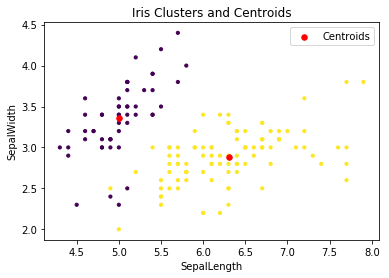

In [41]:
plt.scatter(X.iloc[:, 0], X.iloc[:,1], s = 10, c = kmeans.labels_, label = '')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'red',label = 'Centroids')
plt.title('Iris Clusters and Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()
 
plt.show()